<a href="https://colab.research.google.com/github/kruedae/DRL_in_QuantumTransport/blob/master/Enviroment_construction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tres puntos cuanticos

## Usando qutip

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
! pip install qutip
from qutip import *

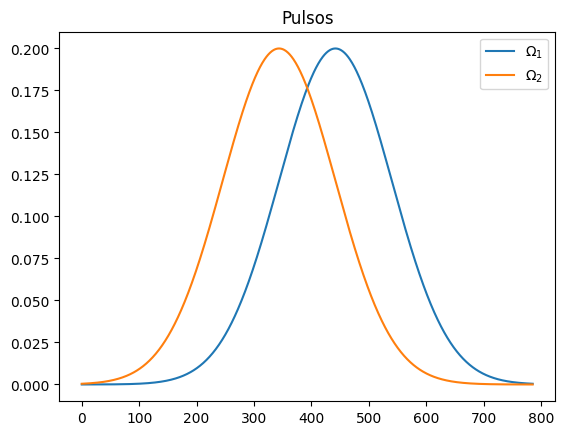

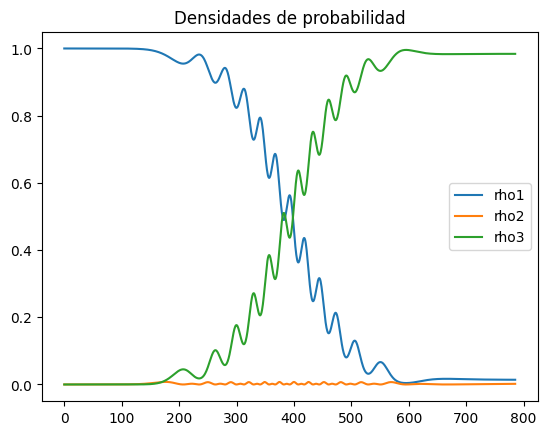

In [2]:
r0 = np.array([[1,0,0],[0,0,0],[0,0,0]])
ro = Qobj(r0)

# Definiendo nuestro hamiltoniano real
omegamax = 0.2
tmax = 50*np.pi/omegamax
def H1_coeff(t, args):
  sigma = tmax/8
  return omegamax*np.exp(-(t - ((tmax+sigma)/2))**2.0/(2*sigma**2.0))
def H2_coeff(t, args):
  sigma = tmax/8
  return omegamax*np.exp(-(t - ((tmax-sigma)/2))**2.0/(2*sigma**2.0))

H0 = np.array([[0,0,0],[0,0,0],[0,0,0]])
H0 = Qobj(H0)
H1 = np.array([[0,-1,0],[-1,0,0],[0,0,0]])
H1 = Qobj(H1)
H2 = np.array([[0,0,0],[0,0,-1],[0,-1,0]])
H2 = Qobj(H2)
H = [H0, [H1, H1_coeff], [H2, H2_coeff]]


#Dinamica del sistema
N = 1000
tlist = np.linspace(0,50,N)*np.pi/omegamax
result = mesolve(H, ro, tlist)

p11 = []
p22 = []
p33 = []

final_result = [result.states[i].full() for i in range(N)] 
for paso in final_result:
  densidad_matrix = np.reshape(paso,(9,))
  p11.append(densidad_matrix[0])
  p22.append(densidad_matrix[4])
  p33.append(densidad_matrix[8]) 

plt.plot(tlist, H1_coeff(tlist,[]), label= r'$\Omega_{1}$')
plt.plot(tlist, H2_coeff(tlist,[]), label=r'$\Omega_{2}$')
plt.title("Pulsos")
plt.legend()
plt.show()


plt.plot(tlist, np.real(p11), label='rho1')
plt.plot(tlist, np.real(p22), label='rho2')
plt.plot(tlist, np.real(p33), label='rho3')
plt.title("Densidades de probabilidad")
plt.legend()
plt.show()

## Usando odeintw

In [3]:
!pip install odeintw
from odeintw import odeintw

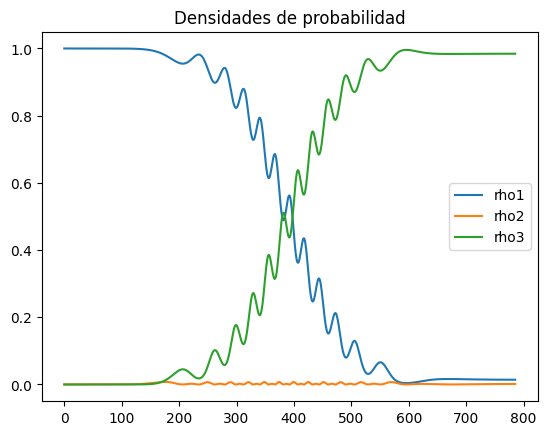

In [4]:
omegamax = 0.2
tmax = 50*np.pi/omegamax
sigma = tmax/8

def right_part(rho, t):
    omega1 = omegamax*np.exp(-(t - ((tmax+sigma)/2))**2.0/(2*sigma**2.0))
    omega2 = omegamax*np.exp(-(t - ((tmax-sigma)/2))**2.0/(2*sigma**2.0))

    hamiltonian = np.array(
        [[0     , -omega1,      0  ],
        [-omega1,    0.0 , -omega2 ],
        [ 0     , -omega2,      0.0]],
        dtype=np.complex128)
    return (np.dot(hamiltonian, rho) - np.dot(rho, hamiltonian)) / (1j)


psi_init = np.array([[1.0, 0.0, 0.0],
                     [0.0, 0.0, 0.0],
                     [0.0, 0.0, 0.0]], dtype=np.complex128)


p11 = []
p22 = []
p33 = []


N = 1000
tlist = np.linspace(0,50,N)*np.pi/omegamax
dt = tlist[-1]/N
for time in tlist:
  
  tpaso = np.linspace(time, time+dt,N)
  sol = odeintw(right_part, psi_init, tpaso)
  psi_init = sol[-1]
  p11.append(sol[-1][0][0])
  p22.append(sol[-1][1][1]) 
  p33.append(sol[-1][2][2])


plt.plot(tlist, np.real(p11), label='rho1')
plt.plot(tlist, np.real(p22), label='rho2')
plt.plot(tlist, np.real(p33), label='rho3')
plt.title("Densidades de probabilidad")
plt.legend()
plt.show()

# detunning

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
! pip install qutip
from qutip import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


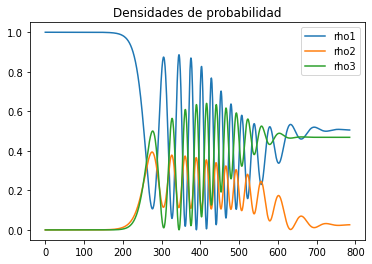

In [ ]:
r0 = np.array([[1,0,0],[0,0,0],[0,0,0]])
ro = Qobj(r0)


# Definiendo nuestro hamiltoniano real
omegamax = 0.2
tmax = 50*np.pi/omegamax
def H1_coeff(t, args):
  sigma = tmax/8
  return omegamax*np.exp(-(t - ((tmax+sigma)/2))**2.0/(2*sigma**2.0))
def H2_coeff(t, args):
  sigma = tmax/8
  return omegamax*np.exp(-(t - ((tmax-sigma)/2))**2.0/(2*sigma**2.0))

#Agregamos terminos de tunning
H0 = np.array([[0,0,0],[0,0.1,0],[0,0,0.1]])
H0 = Qobj(H0)
H1 = np.array([[0,-1,0],[-1,0,0],[0,0,0]])
H1 = Qobj(H1)
H2 = np.array([[0,0,0],[0,0,-1],[0,-1,0]])
H2 = Qobj(H2)
H = [H0, [H1, H1_coeff], [H2, H2_coeff]]

#Dinamica del sistema 
N = 1000
tlist = np.linspace(0,50,N)*np.pi/omegamax
result = mesolve(H, ro, tlist)

p11 = []
p22 = []
p33 = []

final_result = [result.states[i].full() for i in range(N)] 
for paso in final_result:
  densidad_matrix = np.reshape(paso,(9,))
  p11.append(densidad_matrix[0])
  p22.append(densidad_matrix[4])
  p33.append(densidad_matrix[8])


plt.plot(tlist, np.real(p11), label='rho1')
plt.plot(tlist, np.real(p22), label='rho2')
plt.plot(tlist, np.real(p33), label='rho3')
plt.title("Densidades de probabilidad")
plt.legend()
plt.show()


# 5 PUNTOS

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
! pip install qutip
from qutip import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Matrix densidad inicial 
r0 = np.array([[1,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]])
ro = Qobj(r0)

# Definiendo nuestro hamiltoniano real
omegamax = 1
tmax = 100*np.pi/omegamax
def H1_coeff(t, args):
  sigma = tmax/8
  return omegamax*np.exp(-(t - ((tmax+sigma)/2))**2.0/(2*sigma**2.0))
def H2_coeff(t, args):
  sigma = tmax/8
  return omegamax*np.exp(-(t - ((tmax-sigma)/2))**2.0/(2*sigma**2.0))
def H3_coeff(t, args):
  sigma = tmax/8
  return 5.0*omegamax*np.exp(-(t - ((tmax)/2))**2.0/(2*sigma**2.0))


H0 = np.array([[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]])
H0 = Qobj(H0)
H1 = np.array([[0,-1,0,0,0],[-1,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]])
H1 = Qobj(H1)
H2 = np.array([[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,-1],[0,0,0,-1,0]])
H2 = Qobj(H2)
H3 = np.array([[0,0,0,0,0],[0,0,-1,0,0],[0,-1,0,-1,0],[0,0,-1,0,0],[0,0,0,0,0]])
H3 = Qobj(H3)
H = [H0, [H1, H1_coeff], [H2, H2_coeff], [H3, H3_coeff]]

# Dinamica del sistema
N = 1000
tlist = np.linspace(0,100,N)*np.pi/omegamax
result = mesolve(H, ro, tlist)


p11 = []
p22 = []
p33 = []
p44 = []
p55 = []

final_result = [result.states[i].full() for i in range(N)] 
for paso in final_result:
  densidad_matrix = np.reshape(paso,(25,))
  p11.append(densidad_matrix[0])
  p22.append(densidad_matrix[6])
  p33.append(densidad_matrix[12])
  p44.append(densidad_matrix[18])
  p55.append(densidad_matrix[24])

plt.plot(tlist, H1_coeff(tlist,[]), label= r'$\Omega_{1}$')
plt.plot(tlist, H2_coeff(tlist,[]), label=r'$\Omega_{2}$')
plt.plot(tlist, H3_coeff(tlist,[]), label=r'$\Omega_{3}$')
plt.title("Pulsos")
plt.legend()
plt.show()

plt.plot(tlist, np.real(p11), label='rho1')
plt.plot(tlist, np.real(p22), label='rho2')
plt.plot(tlist, np.real(p33), label='rho3')
plt.plot(tlist, np.real(p44), label='rho4')
plt.plot(tlist, np.real(p55), label='rho5')
plt.legend()
plt.show()

# Construyendo el Entorno

###Probando la propiedad de Markov del proceso:

Queremos ver si podemos calcular ρ(t+1), usando la dinámica con ρ(t) como condicion inicial y recalculando todo.

In [ ]:
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random
import numpy as np
import matplotlib.pyplot as plt
!pip install odeintw
from odeintw import odeintw

In [ ]:
class PassageEnv(Env):
    def __init__(self):
        # Limites y espacio de las acciones [omega1, omega2]
        self.action_space = Box(low=np.array([0,0]), high=np.array([1,1]))
        #  Limites y espacio de los estados: [\rho, sigma1, sigma2]
        self.observation_space = Box(low=np.array([0,0,0,0,0,0,0,0,0,0,0]), 
                                high=np.array([1,1,1,1,1,1,1,1,1,1,1]))
        # Set start state
        self.state = np.array([1,0,0,0,0,0,0,0,0,0,0],dtype=np.complex128)

        self.length_trial = 0


    def refuerzo(self, p3, p2):
        return (-1 + p3 - p2) #+ A(p2)

    def step(self, action):
        # Aplicar accion
        omega1 = action[0]
        omega2 = action[1]

        # Cambiar el hamiltoniano
        def right_part(rho, t):
  
          hamiltonian = np.array([[0     , -omega1,      0  ],
                                  [-omega1,    0.0 , -omega2 ],
                                  [ 0     , -omega2,      0.0]],
                                  dtype=np.complex128)
          return (np.dot(hamiltonian, rho) - np.dot(rho, hamiltonian)) / (1j)

        # Evolucion temporal
        N = 100
        omegamax = 1
        dt = (50*np.pi/omegamax)/N
        #tmax = 10
        tpasos = np.linspace(0,dt,N)
        rho = np.array([[self.state[i] for i in range(0,3)],
                      [self.state[i] for i in range(3,6)],
                      [self.state[i] for i in range(6,9)]], dtype=np.complex128)

        result = odeintw(right_part, rho, tpasos)
        final_result = result[-1]
        final_result = np.reshape(final_result,(9,))

        # Nuevo estado a partir de la matriz densidad obtenida
        result = final_result
        #result = [np.mean(i) for i in final_result]
        #result = [i[-2] for i in final_result] # Testeando
        self.state = np.array([result[0], result[1], result[2], result[3], result[4], result[5], result[6], result[7], result[8], omega1, omega2])

        # Calcular el refuerzo
        reward = self.refuerzo(self.state[6], self.state[8])

        done = False

        if self.state[4]>0.05:
          reward -= 100

        self.length_trial += 1
      
        if self.state[8] >= 0.98:
            done = True

        if self.length_trial >= 100:
            done = True

        info = {}

        return self.state, reward, done, info

    def render(self):
        pass

    def reset(self):
        self.state = np.array([1,0,0,0,0,0,0,0,0,0,0])
        self.length_trial = 0
        return self.state

In [ ]:
# Testeando el entorno
env = PassageEnv()

omegamax = 1
tmax = 50*np.pi/omegamax
def H1_coeff(t):
  sigma = tmax/8
  return omegamax*np.exp(-(t - ((tmax+sigma)/2))**2.0/(2*sigma**2.0))
def H2_coeff(t):
  sigma = tmax/8
  return omegamax*np.exp(-(t - ((tmax-sigma)/2))**2.0/(2*sigma**2.0))

N = 100
tlist = np.linspace(0,50, N)*np.pi/omegamax

plt.plot(tlist, H1_coeff(tlist), label='omega1_2')
plt.plot(tlist, H2_coeff(tlist), label='omega2_3')
plt.legend()
plt.show()

env = PassageEnv()

p11 = []
p22 = []
p33 = []
for t in tlist:
  result = env.step([H1_coeff(t), H2_coeff(t)])[0]
  p11.append(result[0])
  p22.append(result[4])
  p33.append(result[8])

plt.plot(tlist, p11, label='rho1')
plt.plot(tlist, p22, label='rho2')
plt.plot(tlist, p33, label='rho3')
plt.legend()
plt.show()

# Construccion del entorno para 5 puntos cuanticos

In [ ]:
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random
import numpy as np
import matplotlib.pyplot as plt
!pip install odeintw
from odeintw import odeintw

In [ ]:
class PassageEnv(Env):
    def __init__(self):
        # Limites y espacio de las acciones [omega1, omega2]
        self.action_space = Box(low=np.array([0,0]), high=np.array([1,1]))
        #  Limites y espacio de los estados: [\rho, sigma1, sigma2]

        """ rho = [ [0,0,0,0,0],       rho_max = [ [1,1,1,1,1],       omega_min = [0,0,0]
                    [0,0,0,0,0],                   [1,1,1,1,1],       omega_max = [1,1,1]
                    [0,0,0,0,0],                   [1,1,1,1,1],
                    [0,0,0,0,0],                   [1,1,1,1,1],
                    [0,0,0,0,0]]                   [1,1,1,1,1] ]                 """

        self.observation_space = Box(low=np.array([0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0]), 
                                high=np.array([1,1,1,1,1, 1,1,1,1,1, 1,1,1,1,1, 1,1,1,1,1, 1,1,1,1,1, 1,1,1]))
        # Set start state
        self.state = np.array([1,0,0,0,0,
                               0,0,0,0,0, 
                               0,0,0,0,0, 
                               0,0,0,0,0,
                               0,0,0,0,0, 0,0,0],dtype=np.complex128)

        self.length_trial = 0


    def refuerzo(self, p5, p2, p3, p4):
        return (-1 + p5 - p2 - p3 - p4) #+ A(p2)

    def step(self, action):
        # Aplicar accion
        omega1 = action[0]
        omega2 = action[1]
        omega3 = action[2]

        # Cambiar el hamiltoniano
        def right_part(rho, t):
  
          hamiltonian = np.array([[    0    ,  -omega1 ,    0    ,    0    ,    0    ],
                                  [ -omega1 ,     0    , -omega3 ,    0    ,    0    ],
                                  [    0    ,  -omega3 ,    0    , -omega3 ,    0    ],
                                  [    0    ,     0    , -omega3 ,    0    , -omega2 ],
                                  [    0    ,     0    ,     0   , -omega2 ,    0    ]],
                                  dtype=np.complex128)
          return (np.dot(hamiltonian, rho) - np.dot(rho, hamiltonian)) / (1j)

        # Evolucion temporal
        N = 100
        omegamax = 1
        dt = (50*np.pi/omegamax)/N
        #tmax = 10
        tpasos = np.linspace(0,dt,N)
        rho = np.array([[self.state[i] for i in range(0,5)],
                        [self.state[i] for i in range(5,10)],
                        [self.state[i] for i in range(10,15)],
                        [self.state[i] for i in range(15,20)],
                        [self.state[i] for i in range(20,25)]], dtype=np.complex128)

        result = odeintw(right_part, rho, tpasos)
        final_result = result[-1]
        final_result = np.reshape(final_result,(25,))

        # Nuevo estado a partir de la matriz densidad obtenida
        result = final_result
        self.state = np.array([result[0], result[1], result[2], result[3], result[4],
                               result[5], result[6], result[7], result[8], result[9],
                               result[10], result[11], result[12], result[13], result[14],
                               result[15], result[16], result[17], result[18], result[19],
                               result[20], result[21], result[22], result[23], result[24],
                               omega1, omega2,omega3])

        # Calcular el refuerzo
        reward = self.refuerzo(self.state[24], self.state[6], self.state[12], self.state[18] )

        done = False
      
        if self.state[6]>0.05 or self.state[12]>0.05  or self.state[18]>0.05 :
          reward -= 100

        self.length_trial += 1
      
        if self.state[24] >= 0.98:
            done = True

        if self.length_trial >= 100:
            done = True

        info = {}

        return self.state, reward, done, info

    def render(self):
        pass

    def reset(self):
        self.state = np.array([1,0,0,0,0,
                               0,0,0,0,0, 
                               0,0,0,0,0, 
                               0,0,0,0,0,
                               0,0,0,0,0, 0,0,0],dtype=np.complex128)
        self.length_trial = 0
        return self.state

In [ ]:
# Testeando el entorno
env = PassageEnv()

omegamax = 1
tmax = 50*np.pi/omegamax

def H1_coeff(t):
  sigma = tmax/8
  return omegamax*np.exp(-(t - ((tmax+sigma)/2))**2.0/(2*sigma**2.0))
def H2_coeff(t):
  sigma = tmax/8
  return omegamax*np.exp(-(t - ((tmax-sigma)/2))**2.0/(2*sigma**2.0))
def H3_coeff(t):
  sigma = tmax/8
  return 5.0*omegamax*np.exp(-(t - ((tmax)/2))**2.0/(2*sigma**2.0))

tlist = np.linspace(0,50,100)*np.pi/omegamax

plt.plot(tlist, H1_coeff(tlist), label='omega1_2')
plt.plot(tlist, H2_coeff(tlist), label='omega2_3')
plt.plot(tlist, H3_coeff(tlist), label='omega3_3')
plt.legend()
plt.show()

env = PassageEnv()

p11 = []
p22 = []
p33 = []
p44 = []
p55 = []

for t in tlist:
  result = env.step([H1_coeff(t), H2_coeff(t), H3_coeff(t)])[0]
  p11.append(result[0])
  p22.append(result[6])
  p33.append(result[12])
  p44.append(result[18])
  p55.append(result[24])

plt.plot(tlist, np.real(p11), label='rho1')
plt.plot(tlist, np.real(p22), label='rho2')
plt.plot(tlist, np.real(p33), label='rho3')
plt.plot(tlist, np.real(p44), label='rho4')
plt.plot(tlist, np.real(p55), label='rho5')
plt.legend()
plt.show()

# Construccion del entorno para 7 puntos cuanticos

In [ ]:
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random
import numpy as np
import matplotlib.pyplot as plt
!pip install odeintw
from odeintw import odeintw

In [ ]:
class PassageEnv(Env):
    def __init__(self):
        # Limites y espacio de las acciones [omega1, omega2, omega3]
        self.action_space = Box(low=np.array([0,0,0]), high=np.array([1,1,1]))
        #  Limites y espacio de los estados: [\rho, omega1, omega2, omega3]

        """ rho = [ [0,0,0,0,0,0,0],       rho_max = [ [1,1,1,1,1,1,1],       omega_min = [0,0,0]
                    [0,0,0,0,0,0,0],                   [1,1,1,1,1,1,1],       omega_max = [1,1,1]
                    [0,0,0,0,0,0,0],                   [1,1,1,1,1,1,1],
                    [0,0,0,0,0,0,0],                   [1,1,1,1,1,1,1],
                    [0,0,0,0,0,0,0],                   [1,1,1,1,1,1,1],
                    [0,0,0,0,0,0,0],                   [1,1,1,1,1,1,1],
                    [0,0,0,0,0,0,0]]                   [1,1,1,1,1,1,1]]                 """

        self.observation_space = Box(low=np.array([0,0,0,0,0,0,0,
                                                   0,0,0,0,0,0,0,
                                                   0,0,0,0,0,0,0,
                                                   0,0,0,0,0,0,0, 
                                                   0,0,0,0,0,0,0,
                                                   0,0,0,0,0,0,0,
                                                   0,0,0,0,0,0,0,  0,0,0]), 
                                     
                                high=np.array([1,1,1,1,1,1,1,
                                               1,1,1,1,1,1,1,
                                               1,1,1,1,1,1,1,
                                               1,1,1,1,1,1,1,
                                               1,1,1,1,1,1,1,
                                               1,1,1,1,1,1,1,
                                               1,1,1,1,1,1,1,  1,1,1]))
        # Set start state
        self.state = np.array([1,0,0,0,0,0,0,
                               0,0,0,0,0,0,0,
                               0,0,0,0,0,0,0,
                               0,0,0,0,0,0,0, 
                               0,0,0,0,0,0,0, 
                               0,0,0,0,0,0,0,
                               0,0,0,0,0,0,0, 0,0,0],dtype=np.complex128)

        self.length_trial = 0


    def refuerzo(self, p7, p2, p3, p4, p5, p6):
        return (-1 + p7 - p2 - p3 - p4 - p5 - p6) #+ A(p2)

    def step(self, action):
        # Aplicar accion
        omega1 = action[0]
        omega2 = action[1]
        omega3 = action[2]

        # Cambiar el hamiltoniano
        def right_part(rho, t):
  
          hamiltonian = np.array([[    0    ,  -omega1 ,    0    ,    0    ,    0    ,    0    ,    0    ],
                                  [ -omega1 ,     0    , -omega3 ,    0    ,    0    ,    0    ,    0    ],
                                  [    0    ,  -omega3 ,    0    , -omega3 ,    0    ,    0    ,    0    ],
                                  [    0    ,     0    , -omega3 ,    0    , -omega3 ,    0    ,    0    ],
                                  [    0    ,     0    ,    0    , -omega3 ,    0    , -omega3 ,    0    ],
                                  [    0    ,     0    ,    0    ,    0    , -omega3 ,    0    , -omega2 ],
                                  [    0    ,     0    ,    0    ,    0    ,    0    , -omega2 ,    0    ]],
                                  dtype=np.complex128)
          return (np.dot(hamiltonian, rho) - np.dot(rho, hamiltonian)) / (1j)

        # Evolucion temporal
        N = 100
        omegamax = 1
        dt = (50*np.pi/omegamax)/N
        #tmax = 10
        tpasos = np.linspace(0,dt,N)
        rho = np.array([[self.state[i] for i in range(0,7)],
                        [self.state[i] for i in range(7,14)],
                        [self.state[i] for i in range(14,21)],
                        [self.state[i] for i in range(21,28)],
                        [self.state[i] for i in range(28,35)],
                        [self.state[i] for i in range(35,42)],
                        [self.state[i] for i in range(42,49)]], dtype=np.complex128)

        result = odeintw(right_part, rho, tpasos)
        final_result = result[-1]
        final_result = np.reshape(final_result,(49,))

        # Nuevo estado a partir de la matriz densidad obtenida
        result = final_result
        self.state = np.array([result[0], result[1], result[2], result[3], result[4],result[5],result[6],
                               result[7], result[8], result[9], result[10], result[11],result[12],result[13],
                               result[14], result[15], result[16], result[17], result[18],result[19],result[20],
                               result[21], result[22], result[23], result[24], result[25],result[26],result[27],
                               result[28], result[29], result[30], result[31], result[32],result[33],result[34],
                               result[35], result[36], result[37], result[38], result[39],result[40],result[41],
                               result[42], result[43], result[44], result[45], result[46],result[47],result[48], 
                               omega1, omega2,omega3])

        # Calcular el refuerzo
        reward = self.refuerzo(self.state[48], self.state[8], self.state[16], self.state[24], self.state[32],self.state[40])

        done = False
      
        if self.state[8]>0.05 or self.state[16]>0.05  or self.state[24]>0.05 or self.state[32]>0.05 or self.state[40]>0.05 :
          reward -= 100

        self.length_trial += 1
      
        if self.state[48] >= 0.98:
            done = True

        if self.length_trial >= 100:
            done = True

        info = {}

        return self.state, reward, done, info

    def render(self):
        pass

    def reset(self):
        self.state = np.array([1,0,0,0,0,0,0,
                               0,0,0,0,0,0,0,
                               0,0,0,0,0,0,0,
                               0,0,0,0,0,0,0, 
                               0,0,0,0,0,0,0, 
                               0,0,0,0,0,0,0,
                               0,0,0,0,0,0,0, 0,0,0],dtype=np.complex128)
        self.length_trial = 0
        return self.state

In [ ]:
# Testeando el entorno
env = PassageEnv()

omegamax = 1
tmax = 50*np.pi/omegamax

def H1_coeff(t):
  sigma = tmax/8
  return omegamax*np.exp(-(t - ((tmax+sigma)/2))**2.0/(2*sigma**2.0))
def H2_coeff(t):
  sigma = tmax/8
  return omegamax*np.exp(-(t - ((tmax-sigma)/2))**2.0/(2*sigma**2.0))
def H3_coeff(t):
  sigma = tmax/8
  return 5.0*omegamax*np.exp(-(t - ((tmax)/2))**2.0/(2*sigma**2.0))

tlist = np.linspace(0,50,100)*np.pi/omegamax

plt.plot(tlist, H1_coeff(tlist), label='omega1_2')
plt.plot(tlist, H2_coeff(tlist), label='omega2_3')
plt.plot(tlist, H3_coeff(tlist), label='omega3_3')
plt.legend()
plt.show()

env = PassageEnv()

p11 = []
p22 = []
p33 = []
p44 = []
p55 = []
p66 = []
p77 = []

for t in tlist:
  result = env.step([H1_coeff(t), H2_coeff(t), H3_coeff(t)])[0]
  p11.append(result[0])
  p22.append(result[8])
  p33.append(result[16])
  p44.append(result[24])
  p55.append(result[32])
  p66.append(result[40])
  p77.append(result[48])

plt.plot(tlist, np.real(p11), label='rho1')
plt.plot(tlist, np.real(p22), label='rho2')
plt.plot(tlist, np.real(p33), label='rho3')
plt.plot(tlist, np.real(p44), label='rho4')
plt.plot(tlist, np.real(p55), label='rho5')
plt.plot(tlist, np.real(p66), label='rho5')
plt.plot(tlist, np.real(p77), label='rho5')
plt.legend()
plt.show()